In [63]:
import pandas as pd
import numpy as np
import seaborn as sns

In [90]:
data_cat = pd.read_csv("../all_hotels_predict_categorized.csv")
data_row = pd.read_csv("../all_hotels_predict_row.csv")

In [65]:
data_row.head()

,Guest_country,Room_info,Nights_stayed,Date_of_stay,Travel_type,Review,Grade,Title,Positive,staff,...,restaurant,noisiness,tv,internet,fitness,covid,temperature,Predicted,Hotel_name,Hotel_chain
0,Kuwait,Superior Double Room,2,August 2018,Family,"Everything you needed was there: iron, microw...",10.0,THE place to be in london.,1,0,...,0,0,0,1,0,0,0,0,Country Hall,Park Plaza
1,United Kingdom,Penthouse Suite (Family),1,March 2021,Solo traveler,"Had the penthouse, initially tv didn’t work b...",7.0,Lovely staff & service 5*,1,1,...,0,0,1,0,0,0,0,1,Country Hall,Park Plaza
2,United Kingdom,Penthouse Suite,1,March 2021,Solo traveler,The property and the penthouse of the hotel \...,10.0,Location is key,1,0,...,0,0,0,0,0,0,0,1,Country Hall,Park Plaza
3,United Kingdom,Studio Double Room,2,February 2021,Couple,Staff were nice and friendly. Room was spacio...,9.0,Perfect stay,1,1,...,0,0,0,0,0,0,0,0,Country Hall,Park Plaza
4,United Kingdom,Executive Studio with London Eye View,1,February 2021,Solo traveler,The view and room are stunning. To top it off...,10.0,Amazing stay,1,1,...,0,0,0,0,0,0,0,0,Country Hall,Park Plaza


In [49]:
data_row.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48478 entries, 0 to 48477
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Guest_country  48478 non-null  object 
 1   Room_info      48478 non-null  object 
 2   Nights_stayed  48478 non-null  int64  
 3   Date_of_stay   48478 non-null  object 
 4   Travel_type    48478 non-null  object 
 5   Review         48478 non-null  object 
 6   Grade          48478 non-null  float64
 7   Title          48478 non-null  object 
 8   Positive       48478 non-null  int64  
 9   staff          48478 non-null  int64  
 10  location       48478 non-null  int64  
 11  food/drink     48478 non-null  int64  
 12  dirty          48478 non-null  int64  
 13  bed            48478 non-null  int64  
 14  comfort        48478 non-null  int64  
 15  price          48478 non-null  int64  
 16  bathroom       48478 non-null  int64  
 17  parking        48478 non-null  int64  
 18  restau

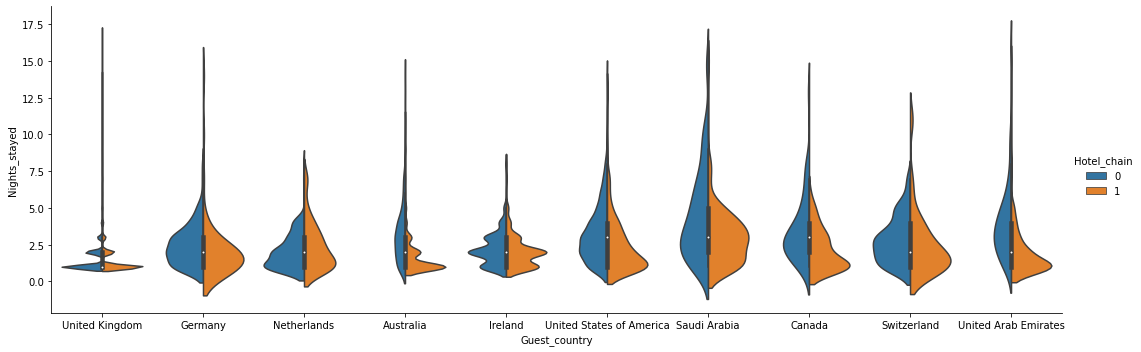

In [66]:
sns.catplot(x='Guest_country', y='Nights_stayed', hue='Hotel_chain', kind='violin', data=data_row_poz, aspect=3, split="True")

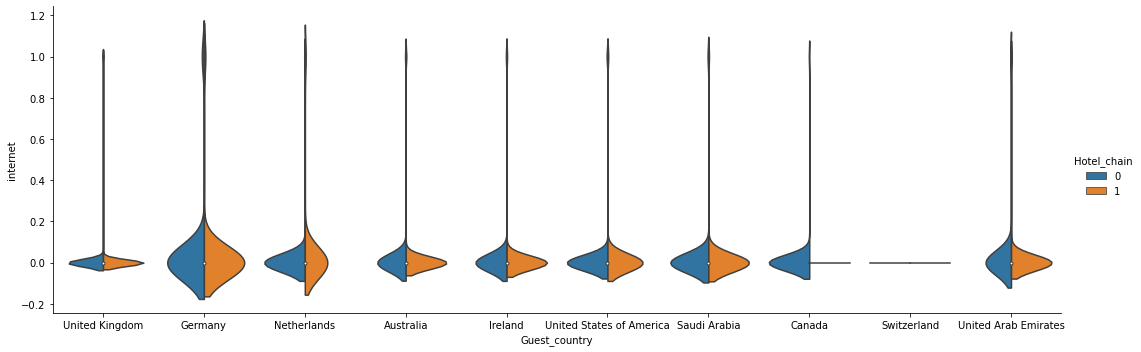

In [75]:
sns.catplot(x='Guest_country', y='internet', hue='Hotel_chain', kind='violin', data=data_row_poz, aspect=3, split="True")

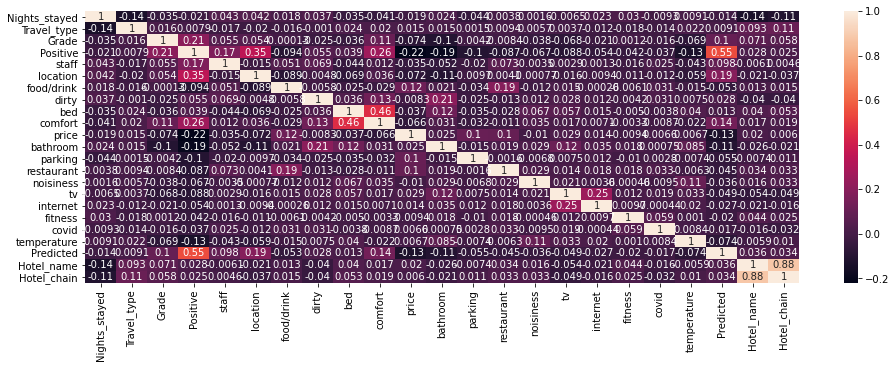

In [74]:
import matplotlib.pyplot as plt
l = data_row['Hotel_name'].factorize()
data_row['Hotel_name'] = l[0]
l = data_row['Hotel_chain'].factorize()
data_row['Hotel_chain'] = l[0]
l = data_row['Travel_type'].factorize()
data_row['Travel_type'] = l[0]
corr = data_row.corr()
plt.figure(figsize = (16,5))
sns.heatmap(corr, annot=True)
plt.show()

In [52]:
guest_country = data_row['Guest_country']
guest_country.value_counts()

United Kingdom              33659
Australia                    2344
United States of America     1749
Ireland                      1208
United Arab Emirates          713
                            ...  
South Sudan                     1
Gambia                          1
Maldives                        1
Syria                           1
Jamaica                         1
Name: Guest_country, Length: 156, dtype: int64

In [53]:
counts = data_row['Guest_country'].value_counts()

data_row_city = data_row[~data_row['Guest_country'].isin(counts[counts < 300].index)]

In [54]:
data_row_city.nunique()

Guest_country       10
Room_info           99
Nights_stayed       18
Date_of_stay        33
Travel_type          4
Review           37853
Grade               37
Title            12513
Positive             2
staff                2
location             2
food/drink           2
dirty                2
bed                  2
comfort              2
price                2
bathroom             2
parking              2
restaurant           2
noisiness            2
tv                   2
internet             2
fitness              2
covid                2
temperature          2
Predicted            2
Hotel_name          17
Hotel_chain          2
dtype: int64

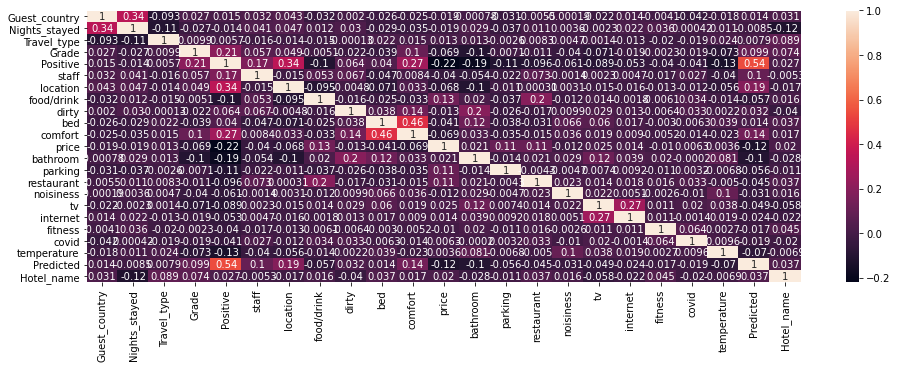

In [69]:
l = data_row_city['Guest_country'].factorize()
data_row_city['Guest_country'] = l[0]
corr = data_row_city.corr()
plt.figure(figsize = (16,5))
sns.heatmap(corr, annot=True)
plt.show()

In [35]:
data_row_poz = data_row_city.loc[data_row_city['Predicted'] > 0]
data_row_neg = data_row_city.loc[data_row_city['Predicted'] < 1]

In [77]:
# sns.pairplot(data=data_row_poz, kind="scatter")
# plt.show()

In [71]:
# pd.crosstab(data_row_city['Guest_country'], data_row_city['Nights_stayed'])

In [83]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109291 entries, 0 to 109290
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Guest_country  109291 non-null  object 
 1   Room_info      109291 non-null  object 
 2   Nights_stayed  109291 non-null  int64  
 3   Date_of_stay   109291 non-null  object 
 4   Travel_type    109291 non-null  object 
 5   Review         109291 non-null  object 
 6   Grade          109291 non-null  float64
 7   Title          109291 non-null  object 
 8   Positive       109291 non-null  int64  
 9   Facilities     109291 non-null  object 
 10  Predicted      109291 non-null  int64  
 11  Hotel_name     109291 non-null  object 
 12  Hotel_chain    109291 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 10.8+ MB


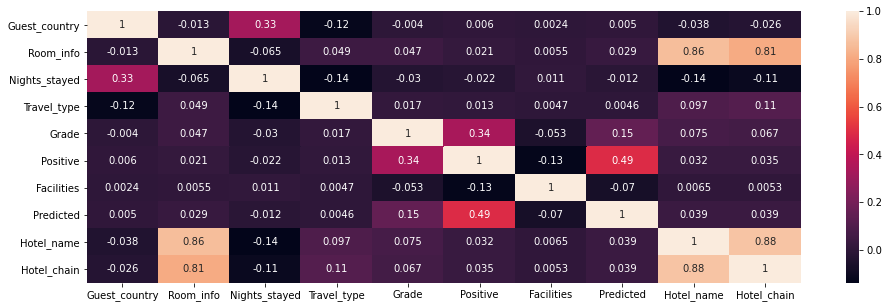

In [92]:
# data_cat['Facilities'] = data_cat.loc[data_cat['Facilities'] == 'location']
l = data_cat['Guest_country'].factorize()
data_cat['Guest_country'] = l[0]
l = data_cat['Travel_type'].factorize()
data_cat['Travel_type'] = l[0]
l = data_cat['Room_info'].factorize()
data_cat['Room_info'] = l[0]
l = data_cat['Facilities'].factorize()
data_cat['Facilities'] = l[0]
l = data_cat['Hotel_name'].factorize()
data_cat['Hotel_name'] = l[0]
l = data_cat['Hotel_chain'].factorize()
data_cat['Hotel_chain'] = l[0]
l = data_cat['Travel_type'].factorize()
data_cat['Travel_type'] = l[0]
corr = data_cat.corr()
plt.figure(figsize = (16,5))
sns.heatmap(corr, annot=True)
plt.show()